In [1]:
from py2neo import Graph
import pandas as pd
import os

import matplotlib.pyplot as plt

# host + port
host = 'http://localhost:11008'

# select database name
#db_name = 'modelparallel'
db_name = 'pagerank'

# credentials for API
user = 'neo4j'
passwd = '1234'

model_graph = Graph(host, auth=(user, passwd), name=db_name)

# HTI Kanten

    time  relationships_out
0      0               8400
1      1               7215
2      2               8189
3      3               8469
4      4               8641
5      5               7016
6      6               7888
7      7               8207
8      8               9239
9      9               9280
10    10               8329
11    11               8899
gesamt: 99772
arithmetisches Mittel:  8314.333333333334


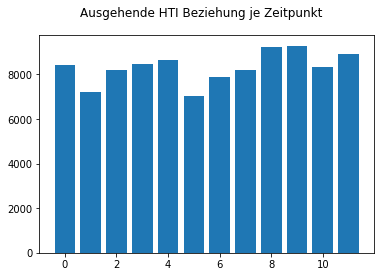

In [6]:
# Anzahl der ausgehenden HTI Kanten pro Zeitpunkt

outgoing_relationships = model_graph.run("""
    MATCH (t1:Measurement)-[:MEASURED_IN]-(:Molecule)-[c:HAS_TRANSFORMED_INTO]->(:Molecule)-[:MEASURED_IN]-(t2:Measurement)
    WHERE t2.timepoint = t1.timepoint + 1
    RETURN t1.timepoint as time, count(c) as relationships_out
""").to_data_frame()

print(outgoing_relationships)
print("gesamt:", outgoing_relationships["relationships_out"].sum())
print("arithmetisches Mittel: ", outgoing_relationships["relationships_out"].mean())

plt.suptitle('Ausgehende HTI Beziehung je Zeitpunkt')
plt.bar(outgoing_relationships.time, outgoing_relationships.relationships_out)
plt.show()

      formula_string   mid  rel_out
0         C12 H10 O8  7839       15
1      C14 H23 N1 O4  7863       14
2         C10 H18 O4  7839       14
3         C15 H24 O4  7868       14
4        C22 H36 O10  7857       14
...              ...   ...      ...
30221    C26 H26 O12  7868        1
30222    C26 H26 O13  7868        1
30223    C28 H30 O17  7845        1
30224  C28 H30 O5 S1  7845        1
30225     C26 H30 O6  7803        1

[30226 rows x 3 columns]
arithmetisches Mittel: 3.300866803414279


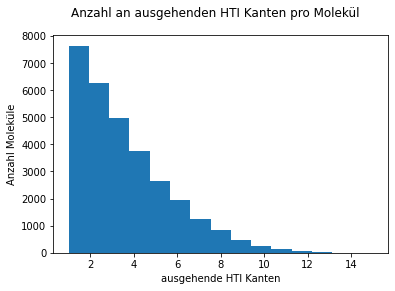

In [7]:
# Knoten mit meisten ausgehenden HTI Kanten (temporaler Graph)

most_outgoing_relationships = model_graph.run("""
    MATCH (m:Molecule)-[c:HAS_TRANSFORMED_INTO]->(:Molecule)
    RETURN m.formula_string as formula_string, m.measurement_id as mid, count(c) as rel_out
    ORDER BY count(c) DESC
""").to_data_frame()

print(most_outgoing_relationships)
print("arithmetisches Mittel:", most_outgoing_relationships["rel_out"].mean())

plt.suptitle('Anzahl an ausgehenden HTI Kanten pro Molekül')
plt.hist(most_outgoing_relationships.rel_out, bins=15)
plt.xlabel('ausgehende HTI Kanten')
plt.ylabel('Anzahl Moleküle')
plt.show()

         formula_string   mid  rel_in
0        C17 H21 N1 O10  7868      16
1          C13 H9 N1 O5  7839      15
2           C22 H18 O13  7851      15
3         C16 H15 N1 O6  7863      15
4        C16 H17 N1 O10  7868      15
...                 ...   ...     ...
25770  C29 H50 N2 O9 S3  7827       1
25771        C26 H46 O9  7868       1
25772       C26 H46 O12  7868       1
25773        C28 H48 O8  7868       1
25774        C29 H48 O8  7868       1

[25775 rows x 3 columns]
arithmetisches Mittel: 3.870882638215325


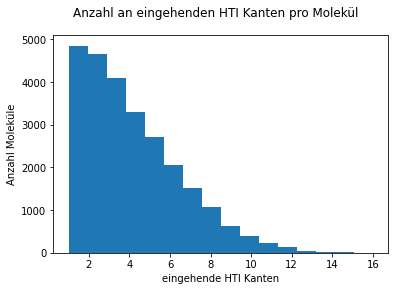

In [8]:
# Knoten mit meisten eingehenden HTI Kanten (temporaler Graph)

most_incoming_relationships = model_graph.run("""
    MATCH (m:Molecule)-[c:HAS_TRANSFORMED_INTO]->(m2:Molecule)
    RETURN m2.formula_string as formula_string, m2.measurement_id as mid, count(c) as rel_in
    ORDER BY count(c) DESC
""").to_data_frame()

print(most_incoming_relationships)
print("arithmetisches Mittel:", most_incoming_relationships["rel_in"].mean())

plt.suptitle('Anzahl an eingehenden HTI Kanten pro Molekül')
plt.hist(most_incoming_relationships.rel_in, bins=16)
plt.xlabel('eingehende HTI Kanten')
plt.ylabel('Anzahl Moleküle')
plt.show()

        formula_string  rel_out
0        C20 H27 N1 O6       47
1        C21 H19 N1 O8       46
2        C22 H23 N1 O8       46
3        C22 H27 N1 O8       45
4     C18 H31 N5 O5 S2       45
...                ...      ...
4228  C15 H28 N2 O7 S3        1
4229  C16 H32 N2 O7 S3        1
4230  C16 H34 N2 O6 S3        1
4231  C15 H34 N2 O7 S3        1
4232      C15 H8 O3 S1        1

[4233 rows x 2 columns]
arithmetisches Mittel: 13.020316560359083


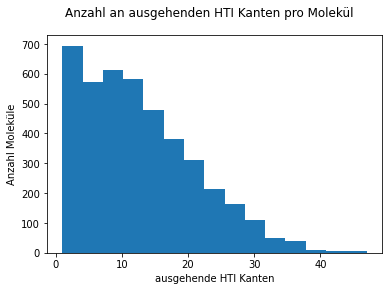

In [11]:
# Knoten mit meisten ausgehenden HTI Kanten (statischer Graph)

most_outgoing_relationships = model_graph.run("""
    MATCH (m:Unique)-[c:TRANSFORMS_TO]->(:Unique)
    RETURN m.formula_string as formula_string, count(c) as rel_out
    ORDER BY count(c) DESC
""").to_data_frame()

print(most_outgoing_relationships)
print("arithmetisches Mittel:", most_outgoing_relationships["rel_out"].mean())

plt.suptitle('Anzahl an ausgehenden HTI Kanten pro Molekül')
plt.hist(most_outgoing_relationships.rel_out, bins=15)
plt.xlabel('ausgehende HTI Kanten')
plt.ylabel('Anzahl Moleküle')
plt.show()

        formula_string  rel_in
0        C20 H19 N1 O8      50
1        C21 H23 N1 O8      50
2     C17 H35 N5 O6 S2      46
3          C29 H36 O11      45
4        C16 H15 N1 O6      44
...                ...     ...
4181        C30 H44 O7       1
4182       C32 H42 O10       1
4183       C33 H36 O15       1
4184       C34 H48 O12       1
4185       C34 H44 O12       1

[4186 rows x 2 columns]
arithmetisches Mittel: 13.16650740563784


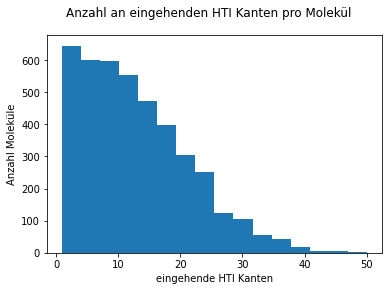

In [10]:
# Knoten mit meisten eingehenden HTI Kanten (statischer Graph)

most_incoming_relationships = model_graph.run("""
    MATCH (m:Unique)-[c:TRANSFORMS_TO]->(m2:Unique)
    RETURN m2.formula_string as formula_string, count(c) as rel_in
    ORDER BY count(c) DESC
""").to_data_frame()

print(most_incoming_relationships)
print("arithmetisches Mittel:", most_incoming_relationships["rel_in"].mean())

plt.suptitle('Anzahl an eingehenden HTI Kanten pro Molekül')
plt.hist(most_incoming_relationships.rel_in, bins=16)
plt.xlabel('eingehende HTI Kanten')
plt.ylabel('Anzahl Moleküle')
plt.show()

# Intensitätstrends

    time  increase
0      0      2583
1      1      2070
2      2      2637
3      3      2653
4      4      2532
5      5      2633
6      6      2924
7      7      1930
8      8      2690
9      9      2163
10    10      2462
11    11      2805
gesamt: 30082
arithmetisches Mittel: 2506.8333333333335


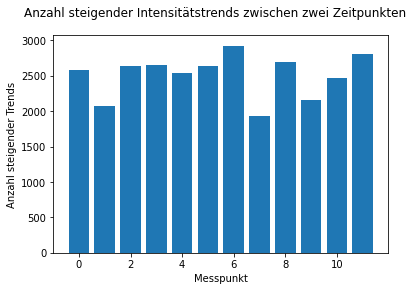

In [13]:
# Anzahl relativ steigender intensitätstrends je zeitpunkt

inc_same_as_relationships = model_graph.run("""
    MATCH (t:Measurement)-[:MEASURED_IN]-(m:Molecule)-[s:SAME_AS]->(m2:Molecule)
    WHERE s.intensity_trend > 1.025
    RETURN t.timepoint as time, count(s) as increase
""").to_data_frame()

print(inc_same_as_relationships)
print("gesamt:", inc_same_as_relationships["increase"].sum())
print("arithmetisches Mittel:",inc_same_as_relationships["increase"].mean())

plt.suptitle('Anzahl steigender Intensitätstrends zwischen zwei Zeitpunkten')
plt.bar(inc_same_as_relationships.time, inc_same_as_relationships.increase)
plt.xlabel('Messpunkt')
plt.ylabel('Anzahl steigender Trends')
plt.show()

    time  decrease
0      0      2256
1      1      3195
2      2      2939
3      3      2811
4      4      2586
5      5      3130
6      6      2651
7      7      3541
8      8      2979
9      9      3983
10    10      4393
11    11      4226
gesamt: 38690
arithmetisches Mittel: 3224.1666666666665


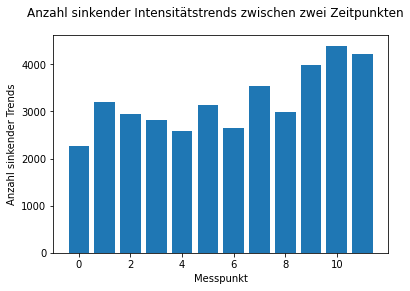

In [14]:
# Anzahl relativ sinkender intensitätstrends je zeitpunkt

dec_same_as_relationships = model_graph.run("""
    MATCH (t:Measurement)-[:MEASURED_IN]-(m:Molecule)-[s:SAME_AS]->(m2:Molecule)
    WHERE s.intensity_trend < 0.975
    RETURN t.timepoint as time, count(s) as decrease
""").to_data_frame()

print(dec_same_as_relationships)
print("gesamt:", dec_same_as_relationships["decrease"].sum())
print("arithmetisches Mittel:", dec_same_as_relationships["decrease"].mean())

plt.suptitle('Anzahl sinkender Intensitätstrends zwischen zwei Zeitpunkten')
plt.bar(dec_same_as_relationships.time, dec_same_as_relationships.decrease)
plt.xlabel('Messpunkt')
plt.ylabel('Anzahl sinkender Trends')
plt.show()

    time  same
0      0   964
1      1   731
2      2   836
3      3   941
4      4  1139
5      5   725
6      6   817
7      7   925
8      8  1047
9      9  1046
10    10  1067
11    11   939
gesamt: 11177
arithmetisches Mittel: 931.4166666666666


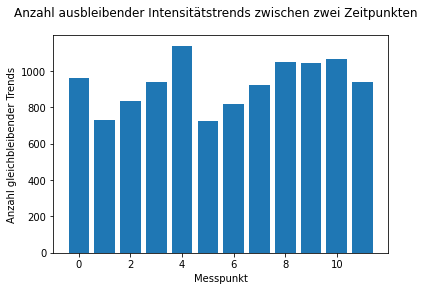

In [15]:
# Anzahl relativ gleichbleibender intensitätstrends je zeitpunkt

same_same_as_relationships = model_graph.run("""
    MATCH (t:Measurement)-[:MEASURED_IN]-(m:Molecule)-[s:SAME_AS]->(m2:Molecule)
    WHERE 0.975 <= s.intensity_trend <= 1.025
    RETURN t.timepoint as time, count(s) as same
""").to_data_frame()

print(same_same_as_relationships)
print("gesamt:", same_same_as_relationships["same"].sum())
print("arithmetisches Mittel:", same_same_as_relationships["same"].mean())

plt.suptitle('Anzahl ausbleibender Intensitätstrends zwischen zwei Zeitpunkten')
plt.bar(same_same_as_relationships.time, same_same_as_relationships.same)
plt.xlabel('Messpunkt')
plt.ylabel('Anzahl gleichbleibender Trends')
plt.show()

# Moleküle in der DB

    time  molecules
0      0       7550
1      1       7543
2      2       8001
3      3       8514
4      4       7910
5      5       8101
6      6       8647
7      7       7827
8      8       8449
9      9       8626
10    10       9716
11    11       9923
12    12       9872
gesamt: 110679
arithmetisches Mittel: 8513.76923076923


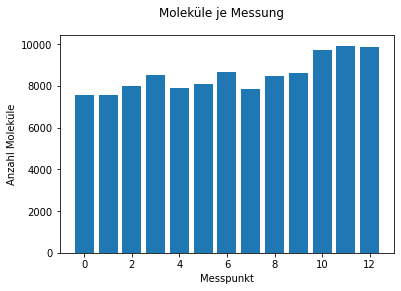

In [16]:
#Anzahl der gemessenen Moleküle je Zeitpunkt

nodes_per_timepoint = model_graph.run("""
    MATCH (m:Molecule)-[:MEASURED_IN]->(t:Measurement)
    RETURN t.timepoint as time, count(m) as molecules
""").to_data_frame()

print(nodes_per_timepoint)
print("gesamt:", nodes_per_timepoint["molecules"].sum())
print("arithmetisches Mittel:", nodes_per_timepoint["molecules"].mean())

plt.suptitle('Moleküle je Messung')
plt.bar(nodes_per_timepoint.time, nodes_per_timepoint.molecules)
plt.xlabel('Messpunkt')
plt.ylabel('Anzahl Moleküle')
plt.show()

0     34.325124
1      9.401755
2      5.860903
3      4.444562
4      3.139203
5      3.038791
6      2.652997
7      2.394039
8      2.478596
9      2.499736
10     2.816827
11     3.826234
12    23.121235
Name: count_formula, dtype: float64
gesamt: 18922


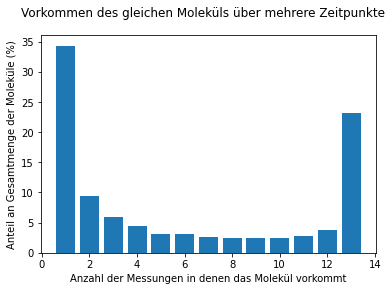

In [12]:
# Wie oft kommt ein Molekül über alle Messpunkte vor
# Wie viele Moleküle werden in allen Zeitpunkten gemessen

count_occurence = model_graph.run("""
MATCH (m:Molecule)
WITH m.formula_string as formula, collect(m.measurement_id) as mid
WITH count(formula) as count_formula, size(mid) as size_mid
RETURN count_formula, size_mid ORDER BY size_mid
""").to_data_frame()

print(count_occurence.count_formula/18922*100)
print("gesamt:", count_occurence["count_formula"].sum())



plt.suptitle('Vorkommen des gleichen Moleküls über mehrere Zeitpunkte')
#lst_count = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.bar(count_occurence.size_mid, count_occurence.count_formula/18922*100)
#plt.bar(lst_count, count_occurence.count_formula)
#plt.xticks(len(count_occurence.size_mid))
plt.xlabel('Anzahl der Messungen in denen das Molekül vorkommt')
plt.ylabel('Anteil an Gesamtmenge der Moleküle (%)')
plt.show()

# Transformationen/Kanten

In [3]:
# Welche Transformationen kommen am Häufigsten vor

transform_count = model_graph.run("""
MATCH ()-[t:HAS_TRANSFORMED_INTO]->()
RETURN t.functional_group as funktionelle_Gruppe, count(t.functional_group) as Anzahl_HTI_Kanten
ORDER BY Anzahl_HTI_Kanten DESC
""").to_data_frame()

transform_count
#print("gesamt:", transform_count.count_fg.sum())

,funktionelle_Gruppe,Anzahl_HTI_Kanten
0,-C1 -O1,7040
1,-C1,6978
2,-C1 -H2,6941
3,O1,6656
4,-H2,6551
5,-C2 -H2,6550
6,H2 O1,6457
7,-C1 -H2 O1,6198
8,-H2 O1,6183
9,-C2 -H4 -O1,6166


In [20]:
# Wie viele Moleküle haben bestimmte Kanten gar nicht

count_missing = model_graph.run("""
MATCH (m:Molecule)-[s]->(:Molecule)
WITH m.formula_string as fs, m.measurement_id as mid, collect(DISTINCT type(s)) as col_type
//WHERE NOT "CAN_TRANSFORM_INTO" IN col_type
//WHERE NOT "HAS_TRANSFORMED_INTO" IN col_type
//WHERE NOT "SAME_AS" IN col_type
WHERE NOT "SAME_AS" IN col_type AND "CAN_TRANSFORM_INTO" IN col_type
RETURN count(fs)
//RETURN fs, mid, col_type LIMIT 10
""").to_data_frame()

print(count_missing)

# HAS_TRANSFORMED_INTO = vorausgesagte Transformation zum nächsten Zeitpunkt

# Wie viele Moleküle haben keine ausgehenden HAS_TRANSFORMED_INTO Kanten
# 76.754 von 110.679 Molekülen (minus 11.177 Moleküle mit gleichbleibender Intensität und minus 9872 Moleküle vom letzten Zeitpunkt)

# Wie viele Moleküle haben keine eingehenden HAS_TRANSFORMED_INTO Kanten
# 80.797 von 110.679 Molekülen (minus 11.177 Moleküle mit gleichbleibender Intensität und minus 7550 Moleküle vom ersten Zeitpunkt)

# Wie viele Moleküle haben weder ausgehende noch eingehende HAS_TRANSFORMED_INTO Kanten
# 63.256 von 110.679 Molekülen

###############################################################################################

# CAN_TRANSFORM_INTO = mögliche Transformation zum nächsten Zeitpunkt

# Wie viele Moleküle haben keine ausgehenden CAN_TRANSFORM_INTO Kanten
# 10.858 von 110.679 Molekülen (minus 9872 Moleküle vom letzten Zeitpunkt)

# Wie viele Moleküle haben keine eingehenden CAN_TRANSFORM_INTO Kanten
# 8964 von 110.679 Molekülen (minus 7550 Moleküle vom ersten Zeitpunkt)

# Wie viele Moleküle haben keine CAN_TRANSFORM_INTO Kante (weder eingehend noch ausgehend)
# 1201 von 110.679

###############################################################################################

# HAS_POSSIBLE_TRANSFORMATION = mögliche Transformationen eines Moleküls innerhalb eines Messpunktes

# Wie viele Moleküle haben gar keine mögliche Transformation mit den gegebenen Regeln (beide Richtungen)
# 1530 von 110.679 Moleküle

###############################################################################################

# SAME_AS = Verbindung zwischen zwei identischen Molekülen zu unterschiedlichen Zeitpunkten

# Wie viele Moleküle haben keine eingehenden oder ausgehenden SAME_AS Beziehungen
# 14.186 von 110.679 Molekülen

   count(fs)
0      16703


# Connected Components

### Test auf SCC 

CALL gds.alpha.scc.write({
  nodeProjection: 'Molecule',
  relationshipProjection: 'HAS_TRANSFORMED_INTO',
  writeProperty: 'HTI_SCC'
})
YIELD setCount, maxSetSize, minSetSize;

### Test auf WCC

#### erstelle graph projection

CALL gds.graph.create(
 "HTI-Graph",
 "Molecule",
 "HAS_TRANSFORMED_INTO"
)

#### teste wcc

CALL gds.wcc.write('HTI-Graph', { writeProperty: 'HTI_WCC' })
YIELD nodePropertiesWritten, componentCount;

In [96]:
# test der HTI wcc Komponenten

model_graph.run("""
MATCH (m:Molecule)
WITH m.HTI_WCC as wcc, collect(m.formula_string) as fs
WHERE size(fs) > 10
RETURN wcc, fs ORDER BY size(fs) DESC
""").to_data_frame()

,wcc,fs
0,11,"[C10 H10 N2 O2, C10 H10 N2 O2, C10 H10 N2 O3, ..."
1,12,"[C10 H11 N5 O1 S2, C10 H11 N5 O1 S2, C10 H11 N..."
2,396,"[C10 H14 N4 O10 S1, C10 H14 N4 O10 S1, C10 H14..."
3,1437,"[C11 H13 N3 S3, C11 H15 N3 S3, C11 H15 N3 S3, ..."
4,724,"[C10 H11 N1 O1 S2, C10 H11 N1 O1 S2, C10 H11 N..."
5,56465,"[C10 H18 N2 O10 S2, C10 H18 N2 O7 S2, C10 H18 ..."
6,701,"[C13 H13 N5 S3, C13 H15 N5 O1 S3, C13 H15 N5 S..."
7,1682,"[C14 H13 N5 O4 S1, C16 H15 N5 O4 S1, C16 H15 N..."
8,3137,"[C14 H28 O5 S1, C14 H28 O6 S1, C14 H30 O3 S1, ..."
9,57874,"[C14 H28 O5 S1, C14 H28 O5 S1, C14 H28 O5 S1, ..."


In [111]:
# test der CTI wcc Komponenten

model_graph.run("""
MATCH (m:Molecule)
WITH m.CTI_WCC as wcc, collect(m.formula_string) as fs
WHERE size(fs) > 10
RETURN wcc, fs ORDER BY size(fs) DESC
""").to_data_frame()

,wcc,fs
0,0,"[C10 H10 N2 O2, C10 H10 N2 O2, C10 H10 N2 O2, ..."
1,53,"[C15 H18 S3, C15 H20 S3, C15 H22 S3, C16 H18 O..."
2,2122,"[C10 H10 N4 O2 S3, C5 H2 N4 O1 S3, C5 H2 N4 O1..."
3,20602,"[C24 H34 N2 O19 S1, C25 H32 N2 O19 S1, C25 H34..."
4,19,"[C15 H16 N2 S2, C17 H18 N2 S2, C17 H18 N2 S2, ..."
5,53505,"[C10 H15 N5 O12, C10 H17 N5 O10, C10 H17 N5 O1..."
6,3605,"[C10 H10 O2 S3, C10 H10 O2 S3, C10 H10 O2 S3, ..."
7,197,"[C10 H10 O2 S3, C10 H10 O2 S3, C10 H10 O2 S3, ..."
8,71524,"[C10 H21 N5 O10, C10 H21 N5 O9, C10 H23 N5 O10..."
9,589,"[C26 H38 N2 O16 S1, C26 H42 N2 O14 S1, C27 H40..."


# PageRank

In [30]:
# pagerank hpt graph

# CALL gds.graph.create('pagerank_hpt', 'Molecule', 'HAS_POSSIBLE_TRANSFORMATION')
# CALL gds.pageRank.write('pagerank_hpt', {maxIterations: 20, dampingFactor: 0.85, writeProperty: 'pagerank_hpt'})

model_graph.run("""
MATCH (m:Molecule)
RETURN m.formula_string, m.pagerank_hpt, m.measurement_id
ORDER BY m.pagerank_hpt
DESC LIMIT 20
""").to_data_frame()

# welche Moleküle haben den höchsten PageRank über alle Zeitpunkte
# C6 H4 O5
# C6 H5 N1 O4
# C4 H9 N5 O4 S2

,m.formula_string,m.hpt,m.measurement_id
0,C6 H4 O5,101.153883,7857
1,C6 H4 O5,98.972053,7839
2,C6 H4 O5,96.351481,7868
3,C6 H4 O5,95.346175,7833
4,C6 H5 N1 O4,95.073548,7857
5,C6 H5 N1 O4,94.261669,7839
6,C6 H4 O5,93.122625,7863
7,C6 H5 N1 O4,92.387724,7868
8,C6 H5 N1 O4,91.737912,7833
9,C6 H4 O5,90.503748,7874


In [32]:
# pagerank hti graph

model_graph.run("""
MATCH (m:Molecule)
RETURN m.formula_string, m.pagerank_hti, m.measurement_id
ORDER BY m.pagerank_hti
DESC LIMIT 20
""").to_data_frame()

# welche Moleküle haben den höchsten PageRank
# C11 H4 O9
# C13 H9 N1 O8
# C20 H12 O13

# Moleküle am Ende des Graphen haben einen höheren PageRank

,m.formula_string,m.pagerank_hti,m.measurement_id
0,C11 H4 O9,5.881338,7868
1,C13 H9 N1 O8,4.726515,7874
2,C20 H12 O13,4.715841,7868
3,C17 H13 N1 O8,4.655010,7874
4,C13 H7 N1 O8,4.607175,7868
5,C4 H9 N5 O2 S2,4.476103,7874
6,C5 H10 N4 O4 S1,4.121299,7874
7,C28 H24 O16,4.046388,7874
8,C4 H9 N5 O2 S2,3.888147,7868
9,C5 H9 N5 O4 S2,3.840616,7863


# Betrachtung der einzigartigen Moleküle als Graph mit HTI Kanten


- alle 18.922 einzigartigen Moleküle werden als seperater Graph gespeichert (weglassen der temporalen Komponente)
- die HTI Kanten vom temporalen Modell werden übertragen
- d.h. hat ein Molekül im temporalen Modell mehrere HTI Kanten vom selben Molekül hat es diese auch im statischen

In [4]:
# Wie viele einzigartige Moleküle haben keine HTI Beziehung (weder eingehend noch ausgehend)
# 9349 von 18.922 Molekülen haben weder im statischen noch im temporalen Modell eine HTI Kante
# d.h. 9573 Moleküle haben mindestens eine HTI Beziehung im Modell (statisch und temporal)

# Code
# MATCH (p:Unique) WHERE NOT (p)-[]-() RETURN count(p)

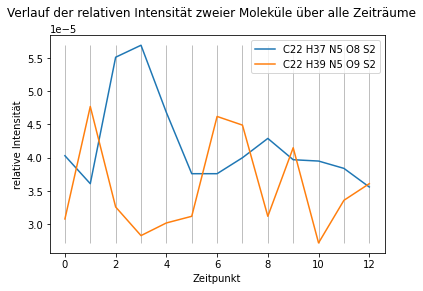

In [33]:
# Verlauf der relativen Intensität zweier Moleküle mit meisten hti Kanten
# C22 H37 N5 O8 S2 und C22 H39 N5 O9 S2

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C22 H37 N5 O8 S2"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

#print(mlc_a)

mlc_b = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C22 H39 N5 O9 S2"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität zweier Moleküle über alle Zeiträume')
plt.plot(mlc_a.time, mlc_a.int)
plt.plot(mlc_b.time, mlc_b.int)
plt.vlines(mlc_a.time, ymin=mlc_b.int.min(), ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C22 H37 N5 O8 S2', 'C22 H39 N5 O9 S2'], loc='upper right')
plt.show()

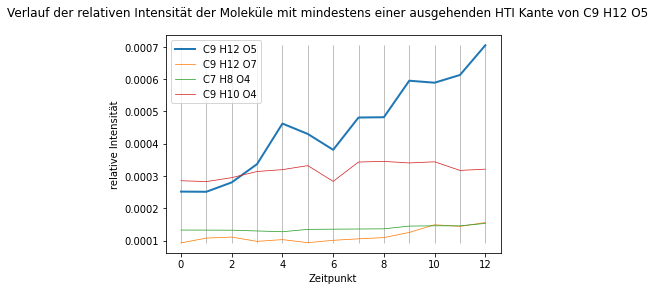

In [51]:
# ausgehende HTI Kanten von C9 H12 O5

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

mlc_b = model_graph.run("""
MATCH (u:Unique)-[h:HTI]->(u1:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as from_fs, u1.formula_string as to_fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = to_fs 
RETURN from_fs, to_fs, collect(m.peak_relint_tic) as col_int, collect(t.timepoint) as col_time
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität der Moleküle mit mindestens einer ausgehenden HTI Kante von C9 H12 O5')
plt.plot(mlc_a.time, mlc_a.int, linewidth=2.0)
plt.plot(mlc_b.col_time[0], mlc_b.col_int[0], linewidth=0.75)
plt.plot(mlc_b.col_time[1], mlc_b.col_int[1], linewidth=0.75)
plt.plot(mlc_b.col_time[2], mlc_b.col_int[2], linewidth=0.75)
plt.vlines(mlc_a.time, ymin=9.26e-05, ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C9 H12 O5', 'C9 H12 O7','C7 H8 O4','C9 H10 O4'], loc='upper left')
plt.show()

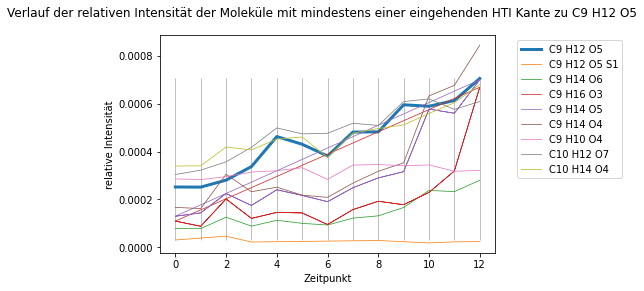

In [65]:
# eingehende HTI Kanten von C9 H12 O5

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

mlc_b = model_graph.run("""
MATCH (u:Unique)<-[h:HTI]-(u1:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as from_fs, u1.formula_string as to_fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = to_fs 
RETURN from_fs, to_fs, collect(m.peak_relint_tic) as col_int, collect(t.timepoint) as col_time
ORDER BY col_int[0] ASC
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität der Moleküle mit mindestens einer eingehenden HTI Kante zu C9 H12 O5')
plt.plot(mlc_a.time, mlc_a.int, linewidth=3.0)
plt.plot(mlc_b.col_time[0], mlc_b.col_int[0], linewidth=0.75)
plt.plot(mlc_b.col_time[1], mlc_b.col_int[1], linewidth=0.75)
plt.plot(mlc_b.col_time[2], mlc_b.col_int[2], linewidth=0.75)
plt.plot(mlc_b.col_time[3], mlc_b.col_int[3], linewidth=0.75)
plt.plot(mlc_b.col_time[4], mlc_b.col_int[4], linewidth=0.75)
plt.plot(mlc_b.col_time[5], mlc_b.col_int[5], linewidth=0.75)
plt.plot(mlc_b.col_time[6], mlc_b.col_int[6], linewidth=0.75)
plt.plot(mlc_b.col_time[7], mlc_b.col_int[7], linewidth=0.75)
plt.vlines(mlc_a.time, ymin=3.02e-05, ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C9 H12 O5', 'C9 H12 O5 S1','C9 H14 O6','C9 H16 O3','C9 H14 O5','C9 H14 O4','C9 H10 O4','C10 H12 O7','C10 H14 O4'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

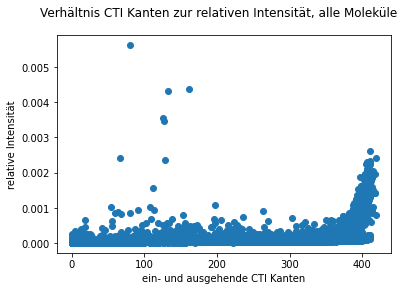

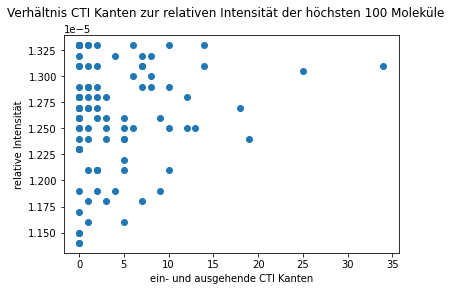

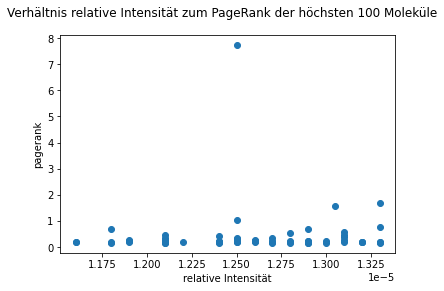

,fs,pagerank
0,C6 H4 O5,102.808649
1,C6 H5 N1 O4,55.058803
2,C4 H9 N5 O4 S2,51.967691
3,C6 H6 O6,46.160857
4,C4 H7 N5 O3 S2,39.523386
5,C7 H5 N1 O6,35.831853
6,C7 H4 O7,30.505440
7,C4 H9 N5 O3 S2,22.254231
8,C6 H6 O5,16.190375
9,C4 H7 N5 O4 S2,15.735697


In [4]:
# Verbindung zwischen CTI Kanten und Intensität im Datensatz

avg_int = model_graph.run("""
MATCH (m:Molecule)
//RETURN m.formula_string, avg(m.peak_relint_tic) as avg ORDER BY avg DESC LIMIT 10
WITH m.formula_string as fs, avg(m.peak_relint_tic) as avg_int
OPTIONAL MATCH (u:Unique)-[h:CTI]->(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, count(h) as c_aus
OPTIONAL MATCH (u:Unique)<-[h2:CTI]-(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, c_aus, count(h2) as c_ein, u.pagerank_cti as pr
RETURN fs, avg_int, c_aus, c_ein, c_aus + c_ein as c_ges, pr
ORDER BY avg_int ASC
""").to_data_frame()

plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(avg_int.c_ges, avg_int.avg_int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität der höchsten 100 Moleküle')
plt.scatter(avg_tmp.c_ges, avg_tmp.avg_int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis relative Intensität zum PageRank der höchsten 100 Moleküle')
plt.scatter(avg_tmp.avg_int, avg_tmp.pr)
plt.xlabel('relative Intensität')
plt.ylabel('pagerank')
plt.show()

model_graph.run("""
MATCH (u:Unique)
RETURN u.formula_string as fs, u.pagerank_cti as pagerank
ORDER BY pagerank DESC LIMIT 20
""").to_data_frame()

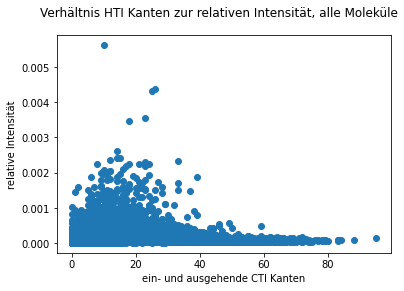

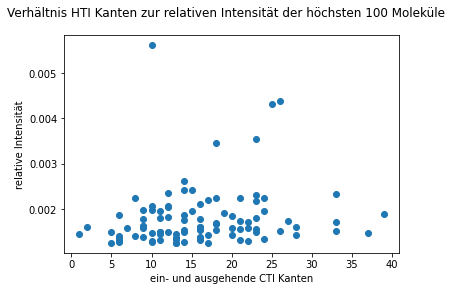

In [97]:
# Verbindung zwischen HTI Kanten und Intensität im Datensatz

avg_int = model_graph.run("""
MATCH (m:Molecule)
//RETURN m.formula_string, avg(m.peak_relint_tic) as avg ORDER BY avg DESC LIMIT 10
WITH m.formula_string as fs, avg(m.peak_relint_tic) as avg_int
OPTIONAL MATCH (u:Unique)-[h:HTI]->(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, count(h) as c_aus
OPTIONAL MATCH (u:Unique)<-[h2:HTI]-(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, c_aus, count(h2) as c_ein
RETURN fs, avg_int, c_aus, c_ein, c_aus + c_ein as c_ges 
ORDER BY avg_int DESC
""").to_data_frame()

plt.suptitle('Verhältnis HTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(avg_int.c_ges, avg_int.avg_int)
plt.xlabel('ein- und ausgehende HTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis HTI Kanten zur relativen Intensität der höchsten 100 Moleküle')
plt.scatter(avg_tmp.c_ges, avg_tmp.avg_int)
plt.xlabel('ein- und ausgehende HTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

# closeness centrality

In [5]:
model_graph.run("""
    CALL gds.alpha.closeness.write({
      nodeProjection: 'Unique',
      relationshipProjection: 'CTI',
      writeProperty: 'centrality'
    }) YIELD nodes, writeProperty
""")

 nodes | writeProperty 
-------|---------------
 18922 | centrality    

                       fs  cen       int
0       C23 H25 N3 O13 S1  0.0  0.000033
1         C11 H6 N2 O1 S3  0.0  0.000028
2           C14 H24 O5 S3  0.0  0.000030
3         C12 H9 N5 O5 S3  0.0  0.000034
4         C12 H9 N5 O5 S3  0.0  0.000026
...                   ...  ...       ...
110674      C12 H21 N5 O7  1.0  0.000025
110675     C35 H34 O13 S2  1.0  0.000023
110676   C31 H29 N3 O9 S1  1.0  0.000039
110677   C31 H29 N3 O9 S1  1.0  0.000030
110678          C6 H10 S3  1.0  0.000020

[110679 rows x 3 columns]


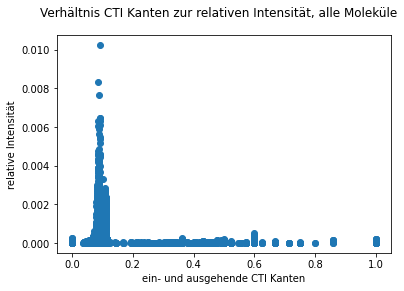

In [24]:
df = model_graph.run("""
    MATCH (u:Unique)
    WITH u.formula_string as fs, u.centrality as cen
    MATCH (m:Molecule)
    WHERE m.formula_string = fs
    RETURN fs, cen, m.peak_relint_tic as int
    ORDER BY cen ASC
""").to_data_frame()

print(df)

plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(df.cen, df.int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

# betweenness centrality

                 fs           bet       int
0       C32 H26 O14 -1.606925e+11  0.000024
1       C32 H26 O14 -1.606925e+11  0.000036
2       C32 H26 O14 -1.606925e+11  0.000033
3       C32 H26 O14 -1.606925e+11  0.000034
4       C32 H26 O14 -1.606925e+11  0.000026
...             ...           ...       ...
110674  C29 H20 O12  6.512413e+11  0.000016
110675  C29 H20 O12  6.512413e+11  0.000024
110676  C29 H20 O12  6.512413e+11  0.000034
110677  C29 H20 O12  6.512413e+11  0.000034
110678  C29 H20 O12  6.512413e+11  0.000024

[110679 rows x 3 columns]


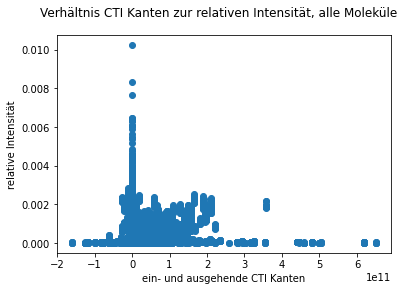

In [29]:
df = model_graph.run("""
    MATCH (u:Unique)
    WITH u.formula_string as fs, u.betweenness as bet
    MATCH (m:Molecule)
    WHERE m.formula_string = fs
    RETURN fs, bet, m.peak_relint_tic as int
    ORDER BY bet 
""").to_data_frame()

print(df)

plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(df.bet, df.int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

           fs  time        ar        pr       int
0   C9 H12 O5     0  0.150000  0.150000  0.000252
1   C9 H12 O5     1  0.198594  0.277500  0.000251
2   C9 H12 O5     2  0.214336  0.385875  0.000280
3   C9 H12 O5     3  0.463100  1.154038  0.000337
4   C9 H12 O5     4  0.300024  1.130933  0.000463
5   C9 H12 O5     5  0.205154  0.470431  0.000430
6   C9 H12 O5     6  0.198121  0.349933  0.000381
7   C9 H12 O5     7  0.214183  0.447443  0.000481
8   C9 H12 O5     8  0.219386  0.530327  0.000482
9   C9 H12 O5     9  0.249281  0.689217  0.000595
10  C9 H12 O5    10  0.230756  0.735834  0.000589
11  C9 H12 O5    11  0.298241  1.185602  0.000613
12  C9 H12 O5    12  0.246617  1.157762  0.000705


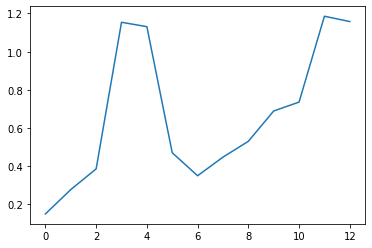

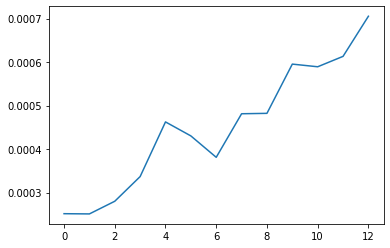

In [4]:
df = model_graph.run("""
MATCH (m:Molecule)-[]->(h:Measurement)
WHERE m.formula_string = 'C9 H12 O5'
RETURN m.formula_string as fs, h.timepoint as time, m.HTI_AR as ar, m.HTI_PR as pr, m.peak_relint_tic as int
ORDER BY time 
""").to_data_frame()

print(df)

#plt.plot(df.time, df.ar)
plt.plot(df.time, df.pr)
plt.show()
plt.plot(df.time, df.int)

           fs  time        pr       int
0   C9 H12 O5     0  0.150000  0.000252
1   C9 H12 O5     1  0.150000  0.000251
2   C9 H12 O5     2  0.150000  0.000280
3   C9 H12 O5     3  0.744738  0.000337
4   C9 H12 O5     4  0.150000  0.000463
5   C9 H12 O5     5  0.150000  0.000430
6   C9 H12 O5     6  0.150000  0.000381
7   C9 H12 O5     7  0.150000  0.000481
8   C9 H12 O5     8  0.150000  0.000482
9   C9 H12 O5     9  0.200223  0.000595
10  C9 H12 O5    10  0.150000  0.000589
11  C9 H12 O5    11  0.198058  0.000613
12  C9 H12 O5    12  0.150000  0.000705


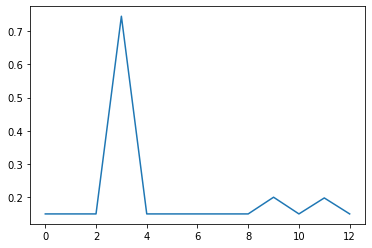

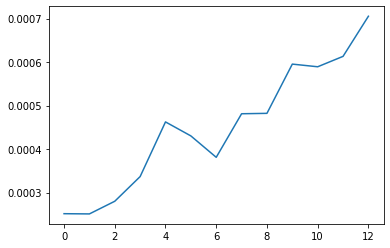

In [7]:
df = model_graph.run("""
MATCH (m:Molecule)-[]->(h:Measurement)
WHERE m.formula_string = 'C9 H12 O5'
RETURN m.formula_string as fs, h.timepoint as time, m.pr as pr, m.peak_relint_tic as int
ORDER BY time 
""").to_data_frame()

print(df)

#plt.plot(df.time, df.ar)
plt.plot(df.time, df.pr)
plt.show()
plt.plot(df.time, df.int)

                    fs    avg_pr       int
262       C8 H13 N1 O6  0.369240  0.000013
319    C9 H15 N1 O2 S2  0.205781  0.000014
485         C11 H18 O1  0.194680  0.000014
723      C14 H15 N1 O2  0.180136  0.000015
725      C10 H19 N1 O5  0.194416  0.000015
...                ...       ...       ...
95153    C15 H15 N1 O7  0.329851  0.000200
95156  C9 H19 N5 O4 S2  0.323497  0.000200
95168         C9 H4 O6  0.163421  0.000200
95170    C16 H17 N1 O8  0.650018  0.000200
95175      C21 H16 O12  0.993360  0.000200

[21827 rows x 3 columns]


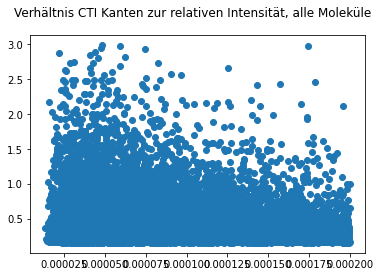

In [58]:
avg_int = model_graph.run("""
MATCH (m:Molecule)
WITH m.formula_string as fs, m.pr as avg_pr, m.peak_relint_tic as int
RETURN fs, avg_pr, int
ORDER BY int ASC
""").to_data_frame()

avg_int = avg_int[avg_int['avg_pr'] > 0.151]
avg_int = avg_int[avg_int['int'] < 0.003]
avg_int = avg_int[avg_int['int'] < 0.0002]
avg_int = avg_int[avg_int['avg_pr'] < 3]
#avg_int = avg_int[avg_int.avg_pr < 0.4]
print(avg_int)


#avg_int[avg_int['fs'] == 'C9 H8 O4']
plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(avg_int.int, avg_int.avg_pr)
#plt.xlabel('rel_int')
#plt.ylabel('pr')
plt.show()